Created: Mon Jan  4 12:31:07 2021

**Group 5 - Classification**  
**Example of a notebook according to the quality charter** (Title)

@authors : T.V

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Création du lien entre le drive et le notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# import

Note: Import only the modules used in the notebook.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# import os
# import sys
import math
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Load Data

In [ ]:
data: pd.DataFrame = pd.read_csv("/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Input/Data_With_Features_Syntax.csv")
data.drop(["Unnamed: 0","art_content","art_content_html","art_extract_datetime","art_lang","art_title",
           "art_url","src_name","src_type","src_url","src_img","art_auth","art_tag","title_postive_score","title_negative_score",
           "title_polarity_score","title_subjectivity_score","netloc.com","ratio_word_title_on_word"],axis = 1, inplace = True)
data["average_word_sentence"] = data["average_word_sentence"].fillna(0)

TF_IDF: pd.DataFrame = pd.read_csv("/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Input/TF-IDF.csv")

BOW: pd.DataFrame = pd.read_csv("/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Input/BOW.csv")

In [ ]:
data.head(3)

,art_id,Nb_key_words,Nb_key_words_title,Nb_words,Nb_words_title,Nb_sentences,average_word_sentence,exclamation,interrogation,ratio_key_words,ratio_key_sentences,ratio_key_word_title,nb_word_path,content_postive_score,content_negative_score,content_polarity_score,content_subjectivity_score
0,0,0,0,0,8,0,0.000000,0,0,0.000000,0.0,0.0,11,0.00,0.0,0.0,0.0
1,1,0,0,40,7,3,13.333333,0,0,0.000000,0.0,0.0,7,0.00,0.0,0.0,0.0
2,2,2,0,157,4,4,39.250000,0,0,0.012739,0.5,0.0,2,0.03,0.0,0.4,1.0


In [ ]:
data.columns[13:]

Index(['content_postive_score', 'content_negative_score',
       'content_polarity_score', 'content_subjectivity_score'],
      dtype='object')

In [ ]:
TF_IDF.columns

Index(['000', '01', '02', '03', '04', '06', '07', '08', '09', '10',
       ...
       'évoque', 'évoquer', 'évoqué', 'événement', 'événements', 'êtes',
       'être', 'île', 'œuvre', 'art_id'],
      dtype='object', length=4820)

# Data (Features)

## PCA

In [ ]:
pca: PCA = PCA(n_components=10)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
new_coord: np.ndarray = pca.transform(data)
eigval: np.ndarray = pca.explained_variance_
print(eigval/np.sum(eigval))
pca.explained_variance_ratio_

[9.06835459e-01 9.30550039e-02 8.19665752e-05 1.42013126e-05
 9.71740626e-06 1.48479535e-06 1.05197189e-06 8.32124861e-07
 2.77093653e-07 5.51850842e-09]


array([9.06835450e-01, 9.30550030e-02, 8.19665743e-05, 1.42013124e-05,
       9.71740616e-06, 1.48479534e-06, 1.05197188e-06, 8.32124853e-07,
       2.77093650e-07, 5.51850836e-09])

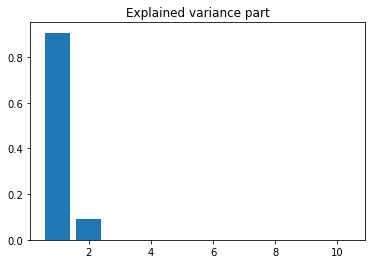

In [ ]:
plt.title("Explained variance part")
plt.bar(range(1, 11), eigval/np.sum(eigval))
plt.show()

## LOF

In [ ]:
# Data
clf: LocalOutlierFactor = LocalOutlierFactor(n_neighbors=2, contamination=0.01)
pred: np.ndarray = clf.fit_predict(data.drop(["art_id"], axis=1))


In [ ]:
pd.Series(pred).value_counts()

 1    12024
-1      122
dtype: int64

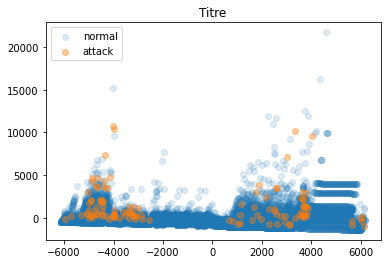

In [ ]:
plt.title('Titre')
plt.scatter(new_coord[pred==1, 0], new_coord[pred==1, 1], alpha=0.15, label='normal')
plt.scatter(new_coord[pred==-1, 0], new_coord[pred==-1, 1], alpha=0.4, label='attack')
plt.legend()

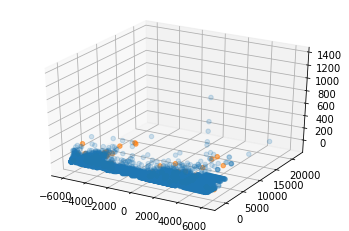

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=new_coord[pred==1, 0], ys=new_coord[pred==1, 1], zs=new_coord[pred==1, 2], alpha=0.2)
ax.scatter(xs=new_coord[pred==-1, 0], ys=new_coord[pred==-1, 1], zs=new_coord[pred==-1, 2], alpha=0.6)

## Isolation Forest

In [ ]:
# Data
clf: IsolationForest = IsolationForest(random_state=0, contamination=0.01)
pred: np.ndarray = clf.fit_predict(data.drop(["art_id"], axis=1))


In [ ]:
pd.Series(pred).value_counts()

 1    12026
-1      120
dtype: int64

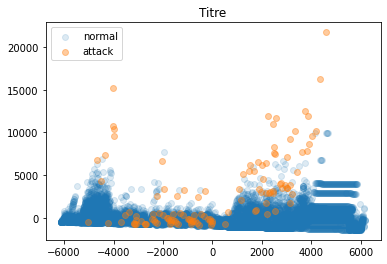

In [ ]:
plt.title('Titre')
plt.scatter(new_coord[pred==1, 0], new_coord[pred==1, 1], alpha=0.15, label='normal')
plt.scatter(new_coord[pred==-1, 0], new_coord[pred==-1, 1], alpha=0.4, label='attack')
plt.legend()
plt.show()

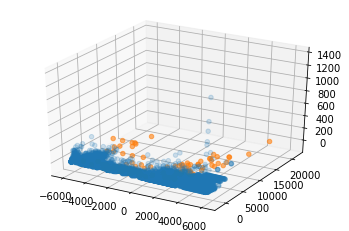

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=new_coord[pred==1, 0], ys=new_coord[pred==1, 1], zs=new_coord[pred==1, 2], alpha=0.2)
ax.scatter(xs=new_coord[pred==-1, 0], ys=new_coord[pred==-1, 1], zs=new_coord[pred==-1, 2], alpha=0.6)
fig.show()

# TF_IDF

## PCA

In [ ]:
pca: PCA = PCA(n_components=10)
pca.fit((TF_IDF-TF_IDF.mean())/TF_IDF.std())

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
new_coord: np.ndarray = pca.transform((TF_IDF-TF_IDF.mean())/TF_IDF.std())
eigval: np.ndarray = pca.explained_variance_
eigval/sum(eigval)

array([0.20262961, 0.1418354 , 0.1044358 , 0.10187499, 0.08615651,
       0.08166855, 0.07546941, 0.07473408, 0.06585755, 0.0653381 ])

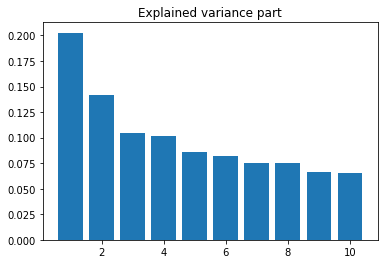

In [ ]:
plt.title("Explained variance part")
plt.bar(range(1, 11), eigval/np.sum(eigval))
plt.show()

## LOF

In [ ]:
TF_IDF.head(3)

,000,01,02,03,04,06,07,08,09,10,100,1000,11,110,118,11h,12,120,13,14,15,150,1500,16,17,18,180,19,1997,1998,1999,1er,20,200,2000,2001,2002,2003,2004,2005,...,étendue,éthique,étions,étranger,étrangers,étrangères,étroite,étroitement,étude,études,étudiant,étudiants,étudier,été,évaluation,évaluer,évalué,éventuellement,éventuelles,évidemment,évidence,évident,éviter,évolue,évoluent,évoluer,évolutif,évolution,évolutions,évolué,évoque,évoquer,évoqué,événement,événements,êtes,être,île,œuvre,art_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [ ]:
# TF_IDF
clf: LocalOutlierFactor = LocalOutlierFactor(n_neighbors=2, contamination=0.01)
pred: np.ndarray = clf.fit_predict(TF_IDF)


In [ ]:
pd.Series(pred).value_counts()

 1    12160
-1      101
dtype: int64

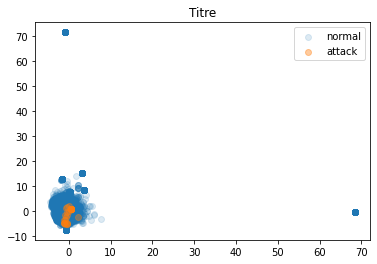

In [ ]:
plt.title('Titre')
plt.scatter(new_coord[pred==1, 1], new_coord[pred==1, 2], alpha=0.15, label='normal')
plt.scatter(new_coord[pred==-1, 1], new_coord[pred==-1, 2], alpha=0.4, label='attack')
plt.legend()

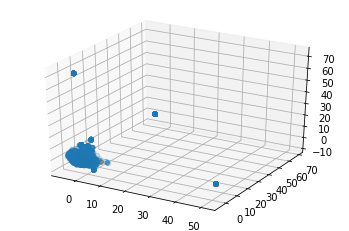

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=new_coord[pred==1, 0], ys=new_coord[pred==1, 1], zs=new_coord[pred==1, 2], alpha=0.2)
ax.scatter(xs=new_coord[pred==-1, 0], ys=new_coord[pred==-1, 1], zs=new_coord[pred==-1, 2], alpha=0.6)
fig.show()

In [ ]:
# Retrieving number columns
number: list = []
for col in TF_IDF.columns:
    try:
        int(col)
        number.append(col)
    except:
        pass
print(number)

['000', '01', '02', '03', '04', '06', '07', '08', '09', '10', '100', '1000', '11', '110', '118', '12', '120', '13', '14', '15', '150', '1500', '16', '17', '18', '180', '19', '1997', '1998', '1999', '20', '200', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2025', '2030', '2050', '21', '22', '2250', '23', '24', '25', '250', '26', '27', '28', '29', '30', '300', '31', '32', '33', '34', '35', '36', '38', '39', '40', '400', '42', '44', '45', '48', '49', '50', '500', '51', '52', '54', '55', '57', '58', '60', '600', '65', '70', '700', '75', '750', '80', '800', '84', '85', '88', '90', '95']


In [ ]:
TF_IDF.drop(number, axis=1).head(3)

,11h,1er,3d,9h,abandonner,abondement,abonder,abondée,abord,aborde,aborder,abordées,abordés,aboutir,absence,absolue,absolument,accepter,accepté,accessibilité,accessible,accessibles,accident,accompagne,accompagnement,accompagnent,accompagner,accompagné,accompagnée,accompagnées,accompagnés,accompli,accomplir,accord,accords,accordé,accordée,accordés,accroissement,accroître,...,étendue,éthique,étions,étranger,étrangers,étrangères,étroite,étroitement,étude,études,étudiant,étudiants,étudier,été,évaluation,évaluer,évalué,éventuellement,éventuelles,évidemment,évidence,évident,éviter,évolue,évoluent,évoluer,évolutif,évolution,évolutions,évolué,évoque,évoquer,évoqué,événement,événements,êtes,être,île,œuvre,art_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [ ]:
clf: LocalOutlierFactor = LocalOutlierFactor(n_neighbors=2, contamination=0.01)
pred: np.ndarray = clf.fit_predict(TF_IDF.drop(number, axis=1))
pd.Series(pred).value_counts()

 1    12192
-1       69
dtype: int64

## Isolation Forest

In [ ]:
clf: IsolationForest = IsolationForest(random_state=0, contamination=0.01)
pred: np.ndarray = clf.fit_predict(TF_IDF.drop(number, axis=1))
pd.Series(pred).value_counts()

 1    12176
-1       85
dtype: int64

# BOW

## LOF

In [ ]:
# BOW
clf: LocalOutlierFactor = LocalOutlierFactor(n_neighbors=2, contamination=0.01)
pred: np.ndarray = clf.fit_predict(BOW)


In [ ]:
pd.Series(pred).value_counts()

 1    12138
-1      123
dtype: int64

## Isolation Forest

In [ ]:
# BOW
clf: IsolationForest = IsolationForest(random_state=0, contamination=0.01)
pred: np.ndarray = clf.fit_predict(BOW)


In [ ]:
pd.Series(pred).value_counts()

 1    12173
-1       88
dtype: int64

#TEST

In [ ]:
# data["art_tag"][201].strip('][\'').split(', ')[0]

# list_tags = set([eval(tags) for tags in data["art_tag"] if type(tags) == str])

list_tags = []
for tags in data["art_tag"]:
    if tags == "Not Found" or not pd.notnull(tags):
        pass
    elif type(tags) == str:
        try:
            list_tags.append(eval(tags))
        except:
            list_tags.append([tags])
    else:
        print(type(tags), tags)
display(list_tags)

KeyError: ignored

In [ ]:
all_tags = set()
for tags in list_tags:
    for tag in tags:
        all_tags.add(tag)

display(all_tags)